In [1]:
import cv2
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
def calculate_entropy(image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist_norm = hist.ravel() / hist.sum()
    entropy = -1 * np.sum(hist_norm * np.log2(hist_norm + 1e-6))
    return entropy

In [3]:
def extract_features(image_path):
    image_color = cv2.imread(image_path)
    image = cv2.imread(image_path, 0)
    edges = cv2.Canny(image, 100, 200)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    edge_count = np.sum(edges == 255)
    contour_count = len(contours)
    entropy = calculate_entropy(image)
    return [edge_count, contour_count, entropy],image_color

In [4]:
def load_and_process_images(folder):
    features = []
    images = []
    filenames = []
    for filename in os.listdir(folder):
        filepath = os.path.join(folder, filename)
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            feature, img = extract_features(filepath)
            features.append(feature)
            images.append(img)
            filenames.append(filename)
    return features, images, filenames

In [5]:
def classify_complexity(features):
    # Normalize features to make the clustering algorithm more effective
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # Assuming 3 clusters for Low, Medium, and High Complexity
    kmeans = KMeans(n_clusters=3, random_state=42)
    labels = kmeans.fit_predict(features_scaled)

    # Map numeric labels to complexity categories
    complexity_map = {0: "Low Complexity", 1: "Medium Complexity", 2: "High Complexity"}
    
    # Sort clusters by their mean complexity score to assign meaningful labels
    mean_complexity = [np.mean([features_scaled[i] for i in range(len(features_scaled)) if labels[i] == num]) for num in range(3)]
    sorted_indices = np.argsort(mean_complexity)  # Returns indices that would sort the array
    sorted_complexity_map = {sorted_indices[i]: complexity_map[i] for i in range(3)}

    return [sorted_complexity_map[label] for label in labels],features_scaled,labels
        
    

In [ ]:
def save_images(images, folder_path):
    os.makedirs(folder_path, exist_ok=True)  # Create folder if it doesn't exist
    for i, image_path in enumerate(images):
        image = cv2.imread(image_path)
        if image is not None:
            cv2.imwrite(os.path.join(folder_path, f"image_{i}.jpg"), image)

In [6]:
def visualize_clusters(images,filenames,features_scaled,labels): # Example: selected from visual inspection of the elbow plot
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(features_scaled)

    # Visualize the clusters
    plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='viridis')
    plt.title('Complexity Clustering of Layouts')
    plt.colorbar()
    plt.show()
    
    unique_labels = np.unique(labels)
    for label in unique_labels:
        plt.figure(figsize=(15, 10))
        cluster_images = [img for img, l in zip(images, labels) if l == label]
        cluster_filenames = [fname for fname, l in zip(filenames, labels) if l == label]
        print(f"Cluster {label + 1} contains {len(cluster_images)} images.")
        columns = 5
        for i, (img, fname) in enumerate(zip(cluster_images, cluster_filenames), 1):
            plt.subplot(len(cluster_images) // columns + 1, columns, i)
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title(fname)
            plt.axis('off')
        plt.show()

Images with Low Complexity are: 
 ['0015.jpg', '0022.jpg', '0027.jpg', '0087.jpg', '0091.jpg', '0092.jpg', '0099.jpg', '0104.jpg', '0144.jpg', '0169.jpg', '0207.jpg', '0214.jpg', '0224.jpg', '0248.jpg', '0253.jpg', '0258.jpg', '0261.jpg', '0264.jpg', '0284.jpg', '0285.jpg', '0323.jpg', '0339.jpg', '0343.jpg', '0390.jpg', '0397.jpg', '0409.jpg', '0432.jpg', '0433.jpg', '0439.jpg', '0466.jpg', '0501.jpg', '0504.jpg', '0520.jpg', '0526.jpg', '0528.jpg', '0564.jpg', '0567.jpg', '0587.jpg', '0595.jpg', '0597.jpg', '0618.jpg', '0627.jpg', '0651.jpg', '0665.jpg', '0666.jpg', '0688.jpg', '0694.jpg', '0696.jpg', '0705.jpg', '0751.jpg', '0754.jpg', '0760.jpg', '0772.jpg', '0789.jpg', '0804.jpg', '0818.jpg', '0892.jpg', '0910.jpg', '0911.jpg', '0928.jpg', '0934.jpg', '0935.jpg', '0937.jpg', '0939.jpg', '0949.jpg', '0980.jpg', '0985.jpg', '0991.jpg', '1004.jpg', '1008.jpg', '1045.jpg', '1049.jpg', '1082.jpg', '1089.jpg', '1135.jpg', '1145.jpg', '1155.jpg', '1158.jpg', '1180.jpg']

Images with Medi

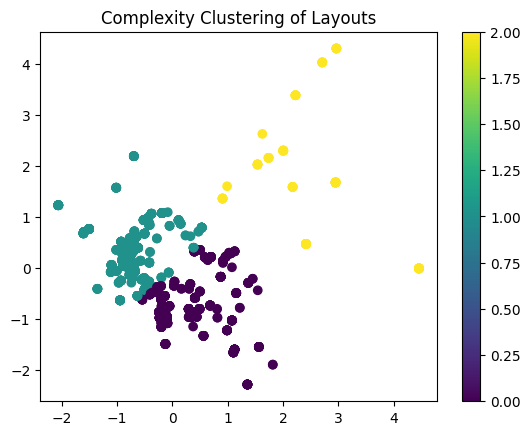

Cluster 1 contains 500 images.


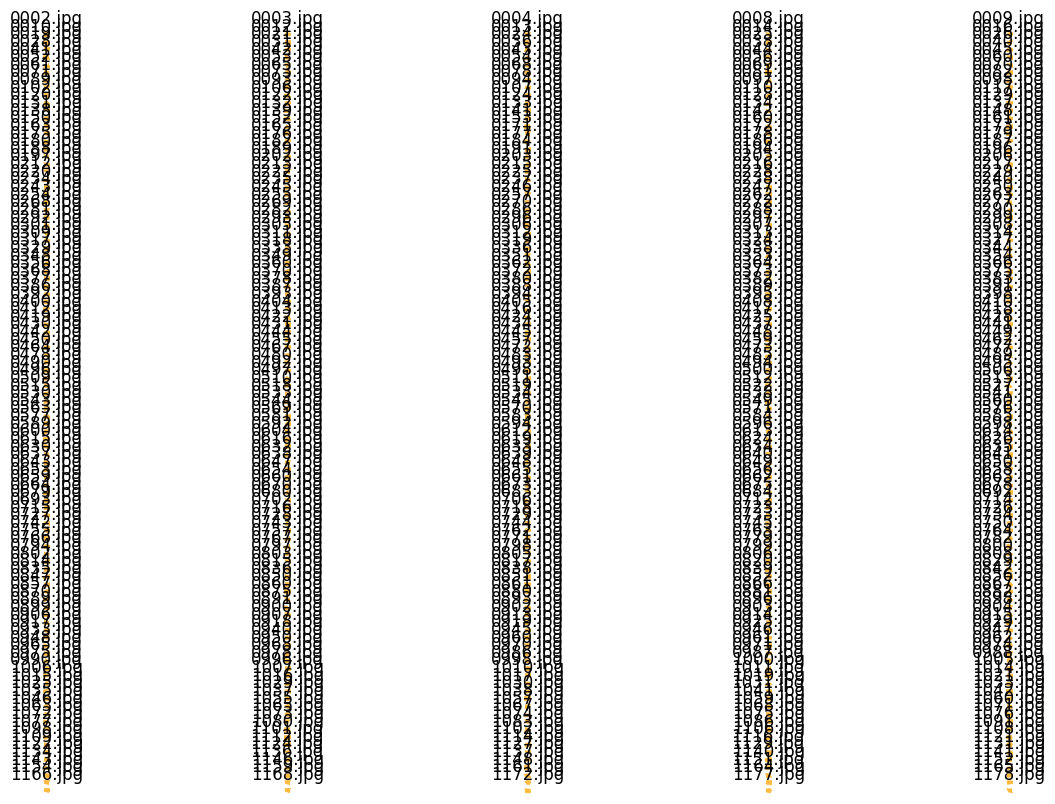

Cluster 2 contains 604 images.


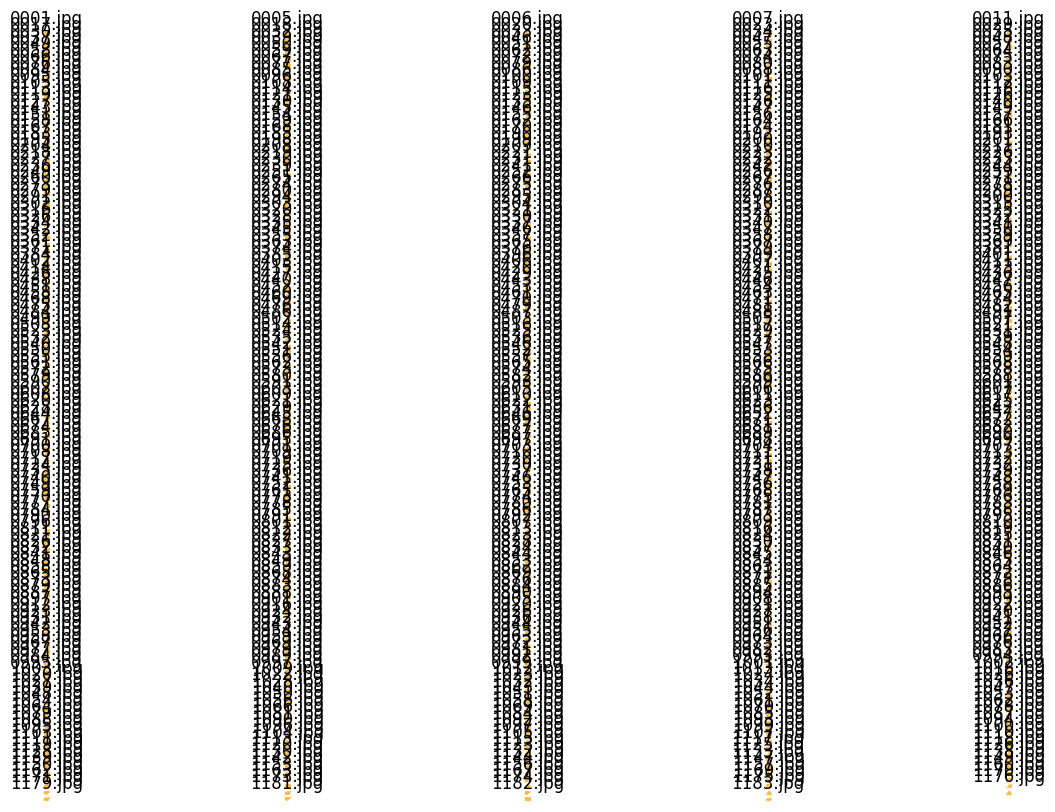

Cluster 3 contains 79 images.


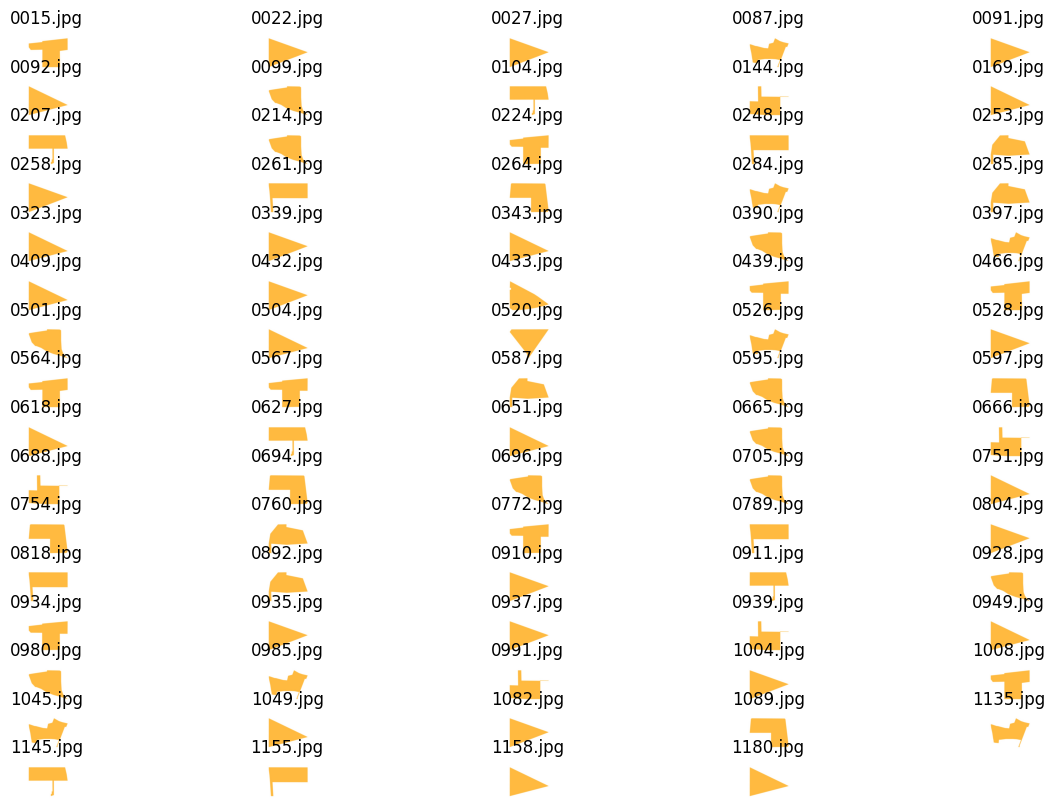

In [7]:
image_directory = 'E7-images'
features,images, filenames = load_and_process_images(image_directory)
complexity_classes,features_scaled,labels = classify_complexity(features)
images_low_complexity =[]
images_medium_complexity =[]
images_high_complexity =[]
for filename, complexity in zip(filenames, complexity_classes):
    if(complexity =="Low Complexity"):
        images_low_complexity.append(filename)
    elif(complexity =="Medium Complexity"):
        images_medium_complexity.append(filename)
    else:
        images_high_complexity.append(filename)

low_complexity_folder = "images_low_complexity"
medium_complexity_folder = "images_medium_complexity"
high_complexity_folder = "images_high_complexity"
print(f"Images with Low Complexity are: \n",images_low_complexity)
print(f"\nImages with Medium Complexity are: \n",images_medium_complexity)
print(f"\nImages with High Complexity are: \n",images_high_complexity)
save_images(images_low_complexity, low_complexity_folder)
save_images(images_medium_complexity, medium_complexity_folder)
save_images(images_high_complexity, high_complexity_folder)
visualize_clusters(images,filenames,features_scaled,labels)

In [7]:
import cv2
import numpy as np
import os
import csv

def process_and_plot_image(image_path, output_path, csv_writer):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Skipping file (not an image or not found): {image_path}")
        return

    # Threshold the image to make it binary
    _, binary_image = cv2.threshold(image, 240, 255, cv2.THRESH_BINARY_INV)

    # Find contours and the bounding rectangle
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        bounding_boxes = [cv2.boundingRect(contour) for contour in contours]
        x, y, width, height = max(bounding_boxes, key=lambda b: b[2] * b[3])
        area = width * height
        perimeter = 2 * (width + height)
    else:
        x, y, width, height = 0, 0, 0, 0
        area = 0
        perimeter = 0

    # Convert grayscale image to color for visualization
    color_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # Draw the tight bounding box
    cv2.rectangle(color_image, (x, y), (x + width, y + height), (0, 255, 0), 2)

    # Draw bounding box covering the total extents of the image
    cv2.rectangle(color_image, (0, 0), (color_image.shape[1], color_image.shape[0]), (0, 0, 255), 2)

    # Annotate the image with area and perimeter
    cv2.putText(color_image, f"Area: {area}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)
    cv2.putText(color_image, f"Perimeter: {perimeter}", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)

    # Save the processed image
    saved_path = os.path.join(output_path, os.path.basename(image_path))
    cv2.imwrite(saved_path, color_image)

    # Write image data to CSV file
    csv_writer.writerow([os.path.basename(image_path), width, height, area, perimeter, saved_path])

def process_folder(input_folder, output_folder, csv_path):
    # Open the CSV file
    with open(csv_path, 'w', newline='') as file:
        writer = csv.writer(file)
        # Write CSV header
        writer.writerow(['Image Name', 'Width', 'Height', 'Area', 'Perimeter', 'Saved Path'])

        # Make sure output directory exists
        if not os.path.exists(output_folder):
            os.makedirs(output_folder)

        # Process each image in the folder
        for filename in os.listdir(input_folder):
            file_path = os.path.join(input_folder, filename)
            if os.path.isfile(file_path):
                process_and_plot_image(file_path, output_folder, writer)
                print(f"Processed and saved: {filename}")

# Specify the input and output folders and CSV file path
input_folder = 'E7-images'
output_folder = 'BB_output'
csv_file_path = 'Dataset.csv'

# Run the processing on the folder
process_folder(input_folder, output_folder, csv_file_path)


Processed and saved: 0001.jpg
Processed and saved: 0002.jpg
Processed and saved: 0003.jpg
Processed and saved: 0004.jpg
Processed and saved: 0005.jpg
Processed and saved: 0006.jpg
Processed and saved: 0007.jpg
Processed and saved: 0008.jpg
Processed and saved: 0009.jpg
Processed and saved: 0010.jpg
Processed and saved: 0011.jpg
Processed and saved: 0012.jpg
Processed and saved: 0013.jpg
Processed and saved: 0014.jpg
Processed and saved: 0015.jpg
Processed and saved: 0016.jpg
Processed and saved: 0017.jpg
Processed and saved: 0018.jpg
Processed and saved: 0019.jpg
Processed and saved: 0020.jpg
Processed and saved: 0021.jpg
Processed and saved: 0022.jpg
Processed and saved: 0023.jpg
Processed and saved: 0024.jpg
Processed and saved: 0025.jpg
Processed and saved: 0026.jpg
Processed and saved: 0027.jpg
Processed and saved: 0028.jpg
Processed and saved: 0029.jpg
Processed and saved: 0030.jpg
Processed and saved: 0031.jpg
Processed and saved: 0032.jpg
Processed and saved: 0033.jpg
Processed 

In [5]:
import csv
import cv2
from sklearn.neighbors import NearestNeighbors
import numpy as np

def load_data(csv_file):
    # Load data from CSV into a list of dictionaries
    with open(csv_file, mode='r') as file:
        reader = csv.DictReader(file)
        data = [row for row in reader]
    return data

def convert_to_array(data):
    # Convert data to numpy array for k-NN
    feature_data = []
    for row in data:
        feature_data.append([float(row['Width']), float(row['Height'])])
    return np.array(feature_data), data

def train_knn_model(features, n_neighbors=5):
    # Train k-NN model on the numerical features
    knn = NearestNeighbors(n_neighbors=n_neighbors, metric='euclidean')
    knn.fit(features)
    return knn

def find_nearest_images(knn, data, input_features, num_results=5):
    # Find nearest images based on input features
    distances, indices = knn.kneighbors([input_features], n_neighbors=num_results)
    nearest_images = [data[idx] for idx in indices[0]]
    return nearest_images

def display_images(images):
    for img in images:
        image_path = img['Saved Path']
        image = cv2.imread(image_path)
        if image is not None:
            cv2.imshow('Nearest Image', image)
            cv2.waitKey(0)  # Wait for any key press
            cv2.destroyAllWindows()
        else:
            print(f"Could not load image at {image_path}")

# Main function to run the program
def main():
    csv_file = 'Dataset.csv'
    data = load_data(csv_file)
    features, data_ref = convert_to_array(data)
    knn_model = train_knn_model(features)
    
    # Example user input
    input_width = 449
    input_height = 350
   
    input_features = [input_width, input_height]
    
    # Find and display nearest images
    nearest_images = find_nearest_images(knn_model, data_ref, input_features)
    for img in nearest_images:
        print(f"Image Name: {img['Image Name']}, Saved Path: {img['Saved Path']}")
        display_images(nearest_images)

if __name__ == '__main__':
    main()


Image Name: 0005.jpg, Saved Path: BB_output\0005.jpg
Image Name: 0001.jpg, Saved Path: BB_output\0001.jpg
Image Name: 0006.jpg, Saved Path: BB_output\0006.jpg
Image Name: 0002.jpg, Saved Path: BB_output\0002.jpg
Image Name: 0003.jpg, Saved Path: BB_output\0003.jpg
